In [105]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
%matplotlib inline
#%matplotlib notebook
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime,timedelta
from itertools import product 

In [4]:
df = pd.read_excel(r'dataprep1.xlsx',sheetname='data_poc')
df.columns = (['Distributor', 'STRIPES_Code', 'month-year', 'Date', 'year','siv'])
df.set_index('Date',inplace=True)

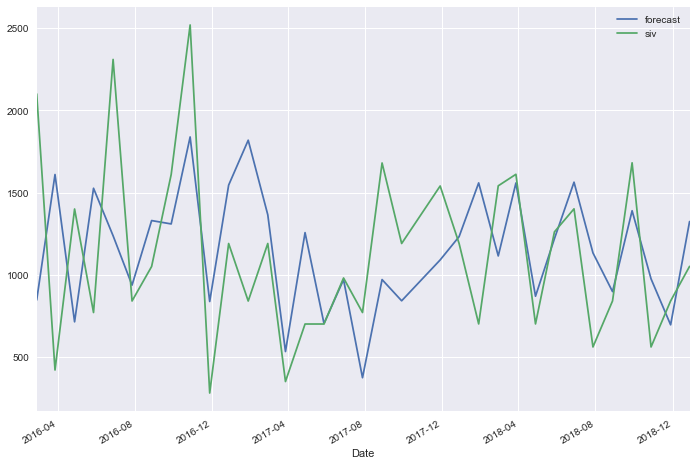

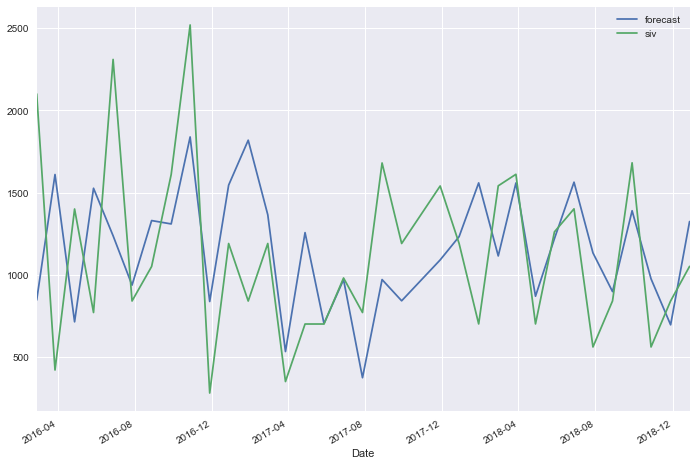

In [80]:
model = ARIMA(df.siv, order=(4,1,1))
model_fit = model.fit(transparams=False,disp=-1,trend='c',start_ar_lags =5,maxiter = 5000)
#print (summary of fit model)
#print(model_fit.summary())
model_fit.plot_predict(dynamic=False)

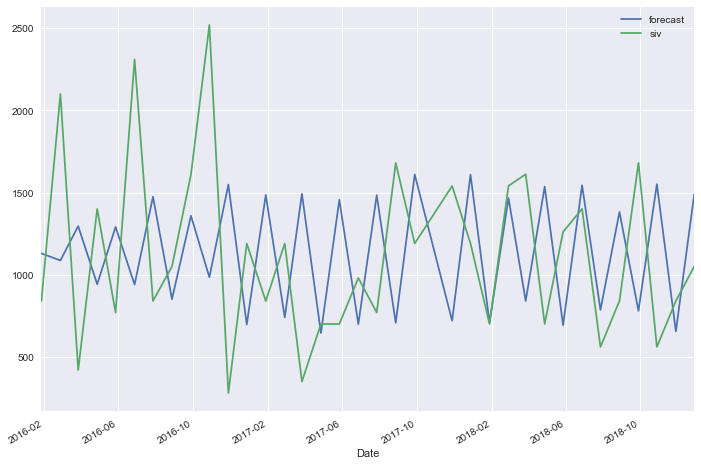

In [56]:
# # Actual vs Fitted
# model_fit.plot_predict(dynamic=False)
# plt.show()

In [57]:
# model_fit.plot_diagnostics(figsize=(15, 12))
# plt.show()

AttributeError: 'ARMAResults' object has no attribute 'plot_diagnostics'

In [59]:
#model_fit.get_forecast(steps=100)

AttributeError: 'ARMAResults' object has no attribute 'get_forecast'

In [60]:
model_fit.forecast()[0]

array([726.76461562])

In [62]:
model_fit.forecast(steps=5)[0]

array([ 726.76461562, 1441.45484088,  848.95442747, 1378.00300972,
        909.48439715])

In [76]:
model_fit.fittedvalues

Date
2016-02-28        6.20
2016-03-28     -490.17
2016-04-28      293.30
2016-05-28      126.22
2016-06-28      467.03
2016-07-28   -1,373.55
2016-08-28      489.49
2016-09-28      259.08
2016-10-28      228.42
2016-11-28   -1,683.12
2016-12-28    1,265.30
2017-01-28      628.72
2017-02-28      524.60
2017-03-28     -657.50
2017-04-28      906.29
2017-05-28        3.05
2017-06-28      270.14
2017-07-28     -606.79
2017-08-28      200.46
2017-09-28     -838.79
2017-11-28     -100.06
2017-12-28     -308.16
2018-01-28      368.72
2018-02-28      413.83
2018-03-28       17.26
2018-04-28     -742.07
2018-05-28      518.97
2018-06-28      302.28
2018-07-28     -268.16
2018-08-28      336.98
2018-09-28      548.87
2018-10-28     -706.13
2018-11-28      134.75
2018-12-28      483.06
dtype: float64

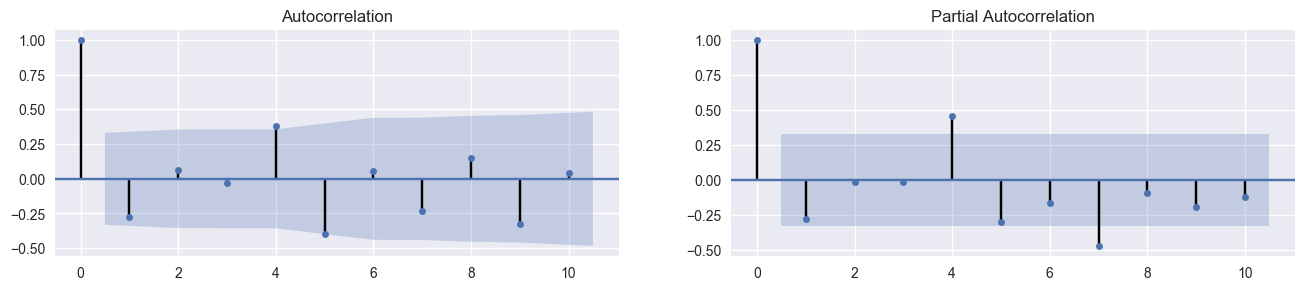

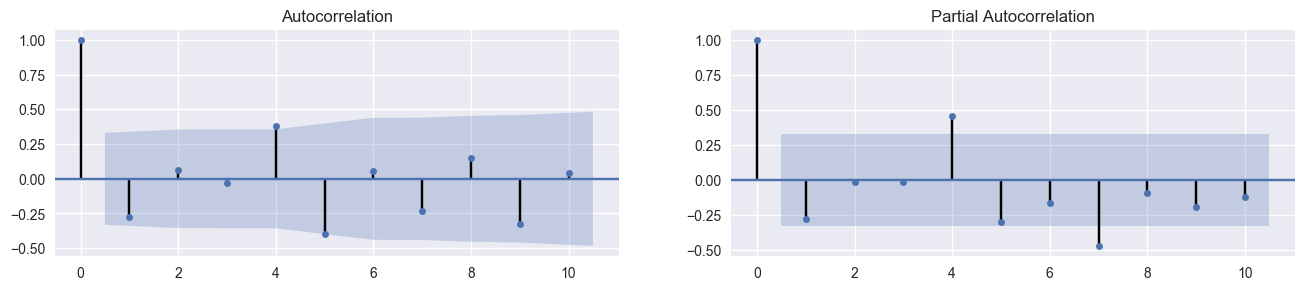

In [81]:
# from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.siv.tolist(), lags=10, ax=axes[0])
plot_pacf(df.siv.tolist(), lags=10, ax=axes[1])

In [83]:
model_fit.predict(0,30)

ValueError: The start index -1 of the original series  has been differenced away

In [110]:
#model_fit.predict(start=1, end=len(df.siv))
#model_fit.predict(start='2016-02-28',end='2018-12-28')
#model_fit.predict(start=datetime(2016,2,28),end=datetime(2018,12,28)) ## not working

TypeError: int() argument must be a string, a bytes-like object or a number, not 'datetime.datetime'

In [112]:
model_fit.predict(start='2018-12-28',end='2018-12-28')

Date
2018-12-28   483.06
dtype: float64

In [113]:
model_fit.forecast()[0]

array([923.13662958])

In [103]:
df.siv

Date
2016-01-28     840.00
2016-02-28   2,100.07
2016-03-28     420.08
2016-04-28   1,400.00
2016-05-28     770.04
2016-06-28   2,310.27
2016-07-28     840.16
2016-08-28   1,050.04
2016-09-28   1,610.03
2016-10-28   2,520.15
2016-11-28     280.00
2016-12-28   1,189.96
2017-01-28     840.00
2017-02-28   1,190.12
2017-03-28     349.96
2017-04-28     700.08
2017-05-28     700.08
2017-06-28     980.08
2017-07-28     770.04
2017-08-28   1,680.15
2017-09-28   1,190.12
2017-11-28   1,540.07
2017-12-28   1,190.12
2018-01-28     700.56
2018-02-28   1,541.14
2018-03-28   1,611.31
2018-04-28     700.56
2018-05-28   1,260.95
2018-06-28   1,400.96
2018-07-28     560.39
2018-08-28     840.58
2018-09-28   1,681.16
2018-10-28     560.39
2018-11-28     840.58
2018-12-28   1,050.76
Name: siv, dtype: float64

In [92]:
#predicted = df.siv.shift(1) +  model_fit.predict(start=1, end=len(df.siv))
##predicted = df.siv.shift(1) + model_fit.predict(start='2016-02-28',end='2018-12-28')
predicted = df.siv.shift(1) + model_fit.fittedvalues
#df.siv.to_frame().join(predicted.to_frame()).plot()

df.siv.to_frame().join(predicted.to_frame()).plot()

In [147]:
base_time_frame = pd.date_range(start="2016-01-01",end="2020-12-01",freq="MS")

In [118]:
len(base_time_frame)

55

In [120]:
dist_mat_df = pd.read_excel(r'dataprep1.xlsx',sheetname='dist_mat_code')

In [121]:
dist_mat_df.columns

Index(['Distributor', 'STRIPES Code'], dtype='object')

In [123]:
dist_list = dist_mat_df['Distributor'].tolist()
mat_code  = dist_mat_df['STRIPES Code'].tolist()

In [122]:
from itertools import product

In [ ]:
base_time_frame

In [129]:
list(product(mat_code,base_time_frame.values))

[(135988, numpy.datetime64('2016-01-31T00:00:00.000000000')),
 (135988, numpy.datetime64('2016-02-29T00:00:00.000000000')),
 (135988, numpy.datetime64('2016-03-31T00:00:00.000000000')),
 (135988, numpy.datetime64('2016-04-30T00:00:00.000000000')),
 (135988, numpy.datetime64('2016-05-31T00:00:00.000000000')),
 (135988, numpy.datetime64('2016-06-30T00:00:00.000000000')),
 (135988, numpy.datetime64('2016-07-31T00:00:00.000000000')),
 (135988, numpy.datetime64('2016-08-31T00:00:00.000000000')),
 (135988, numpy.datetime64('2016-09-30T00:00:00.000000000')),
 (135988, numpy.datetime64('2016-10-31T00:00:00.000000000')),
 (135988, numpy.datetime64('2016-11-30T00:00:00.000000000')),
 (135988, numpy.datetime64('2016-12-31T00:00:00.000000000')),
 (135988, numpy.datetime64('2017-01-31T00:00:00.000000000')),
 (135988, numpy.datetime64('2017-02-28T00:00:00.000000000')),
 (135988, numpy.datetime64('2017-03-31T00:00:00.000000000')),
 (135988, numpy.datetime64('2017-04-30T00:00:00.000000000')),
 (135988

In [148]:
mat_time_combo = pd.DataFrame(list(product(base_time_frame,mat_code)),columns=['date','matCode'])
train_data_max_date = datetime.strptime('20190801',"%Y%m%d")

In [151]:
mat_time_combo.head()

,date,matCode
0,2016-01-01,135988
1,2016-01-01,136071
2,2016-01-01,139312
3,2016-01-01,139343
4,2016-01-01,139362
